# Imports

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import math 

import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data

In [2]:
path = "data.xls"
df = pd.read_excel(path)

In [3]:
df.shape

(30001, 24)

In [4]:
df.columns.values

array(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'], dtype=object)

In [5]:
# Mettre la première ligne en nom des colonnes
df.columns = df.iloc[0]

# et effacer celle-ci
df.drop("ID", inplace=True)

In [6]:
df.sample(5)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
23001,230000,2,2,1,46,-1,-1,-1,-1,-1,...,632,316,2398,316,0,632,316,2398,1783,1
20067,20000,2,2,2,45,0,0,0,0,-2,...,-1560,-1560,-1560,1245,1400,0,0,0,0,0
22122,170000,2,2,2,29,-1,-1,-1,-1,-1,...,1042,1577,1574,1359,886,1051,1577,1574,287,0
12680,150000,2,1,1,35,0,0,0,0,0,...,32264,25579,0,8000,5175,3000,10000,0,0,0
20253,80000,2,2,2,49,-1,-1,-1,-1,-1,...,390,780,390,390,390,390,780,0,390,1


# Visualisation des données

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null object
SEX                           30000 non-null object
EDUCATION                     30000 non-null object
MARRIAGE                      30000 non-null object
AGE                           30000 non-null object
PAY_0                         30000 non-null object
PAY_2                         30000 non-null object
PAY_3                         30000 non-null object
PAY_4                         30000 non-null object
PAY_5                         30000 non-null object
PAY_6                         30000 non-null object
BILL_AMT1                     30000 non-null object
BILL_AMT2                     30000 non-null object
BILL_AMT3                     30000 non-null object
BILL_AMT4                     30000 non-null object
BILL_AMT5                     30000 non-null object
BILL_AMT6                     30000 non-null object
PAY_AMT1    

In [8]:
# Pas de valeurs manquantes
# Renommer la target
df = df.rename(columns={'default payment next month': 'target'})

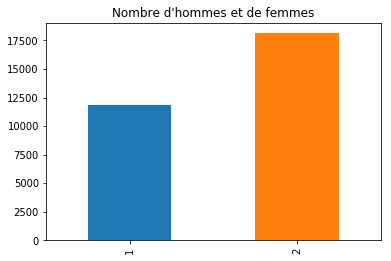

In [9]:
df.SEX.value_counts().sort_index().plot(kind='bar', title="Nombre d'hommes et de femmes")

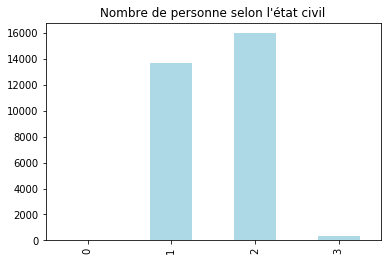

In [10]:
df.MARRIAGE.value_counts().sort_index().plot(kind = 'bar', color="lightBlue", title="Nombre de personne selon l'état civil")

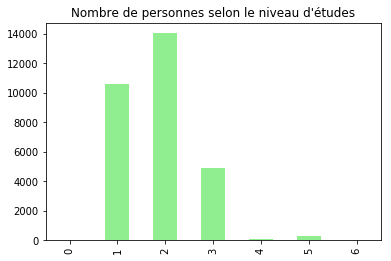

In [11]:
df.EDUCATION.value_counts().sort_index().plot(kind='bar', color="lightGreen", title="Nombre de personnes selon le niveau d'études")

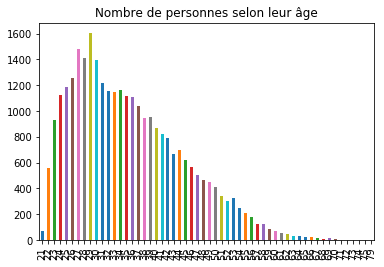

In [12]:
df.AGE.value_counts().sort_index().plot(kind="bar", title="Nombre de personnes selon leur âge")

In [13]:
df.AGE.value_counts().index.sort_values()

Int64Index([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
            38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
            55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
            72, 73, 74, 75, 79],
           dtype='int64')

In [14]:
# Nouvelle colonne pour avoir une tranche d'âge car illisible sinon 
def age_range(x):
    return math.trunc(x/10)*10
df["age_range"] = df.AGE.map(age_range)

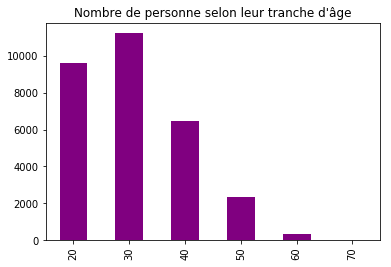

In [15]:
df.age_range.value_counts().sort_index().plot(kind='bar', color="purple", title = "Nombre de personne selon leur tranche d'âge")

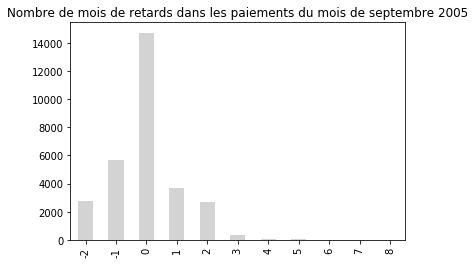

In [16]:
df.PAY_0.value_counts().sort_index().plot(kind="bar", color="lightgray", title="Nombre de mois de retards dans les paiements du mois de septembre 2005")

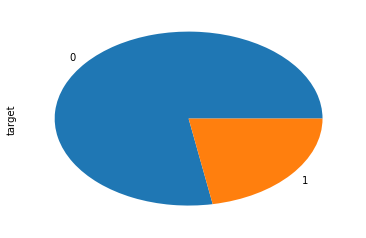

In [17]:
df["target"].value_counts().plot(kind="pie")

In [18]:
target_by_sex = pd.crosstab(df.SEX, df.target)
target_by_sex

target,0,1
SEX,,
1,9015,2873
2,14349,3763


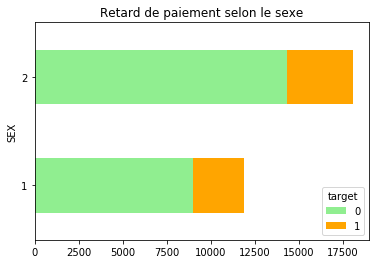

In [19]:
target_by_sex.plot(kind='barh', stacked = True, color=["lightgreen","orange"], title="Retard de paiement selon le sexe")

In [20]:
target_by_situation = pd.crosstab(df.MARRIAGE, df.target)
target_by_situation

target,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


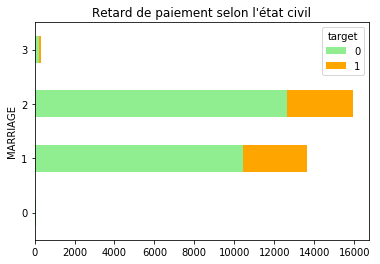

In [21]:
target_by_situation.plot(kind='barh', stacked = True, color=["lightgreen","orange"], title="Retard de paiement selon l'état civil")

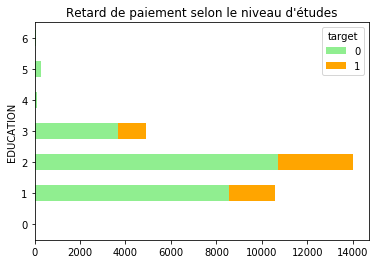

In [22]:
target_by_education = pd.crosstab(df.EDUCATION, df.target)
target_by_education.plot(kind='barh', stacked = True, color=["lightgreen","orange"], title="Retard de paiement selon le niveau d'études")

#Pour rapport : en terme de pourcentage => plus le niveau d'étude est élevé, moins il y a de retard


# Cleaning Data

In [23]:
# Renommer certaines colonnes 
df = df.rename(columns={'PAY_0': 'Sept_Pay', 
                        'PAY_2': 'Aug_Pay', 
                        'PAY_3': 'July_Pay', 
                        'PAY_4': 'June_Pay', 
                        'PAY_5': 'May_Pay', 
                        'PAY_6': 'Apr_Pay', 
                        
                        'BILL_AMT1': 'Sept_Bill', 
                        'BILL_AMT2': 'Aug_Bill', 
                        'BILL_AMT3': 'July_Bill', 
                        'BILL_AMT4': 'June_Bill', 
                        'BILL_AMT5': 'May_Bill', 
                        'BILL_AMT6': 'Apr_Bill', 
                        
                        'PAY_AMT1': 'Sept_Previous_Payment', 
                        'PAY_AMT2': 'Aug_Previous_Payment', 
                        'PAY_AMT3': 'July_Previous_Payment', 
                        'PAY_AMT4': 'June_Previous_Payment', 
                        'PAY_AMT5': 'May_Previous_Payment', 
                        'PAY_AMT6': 'Apr_Previous_Payment',})

In [24]:
# Pas de correspondance pour les niveaux d'études 0,5 et 6 donc on les rassemble dans 4="others" 
condition = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[condition, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [25]:
# Pareil pour marriage :
condition = (df.MARRIAGE == 0)
df.loc[condition, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [26]:
# Remplacer les -2 et 0 qui ne sont pas documentés => remplacés par -1=paiement sans retard
columnList = ["Sept_Pay", "Aug_Pay", "July_Pay", "June_Pay", "May_Pay", "Apr_Pay"]
for x in columnList:
    condition = (df[x] == -2) | (df[x] == 0)
    df.loc[condition, x] = -1

# Feature Engineering

In [27]:
df['SEX_MAR'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'SEX_MAR'] = 1 #homme marrié
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'SEX_MAR'] = 2 #homme célibataire
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'SEX_MAR'] = 3 #homme "autre"
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'SEX_MAR'] = 4 #femme mariée
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'SEX_MAR'] = 5 #femme célibataire
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'SEX_MAR'] = 6 #femme "autre"

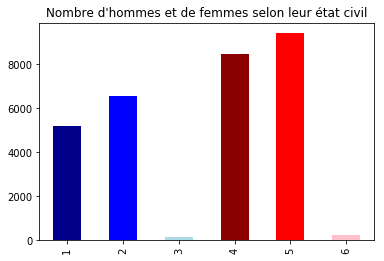

In [28]:
df.SEX_MAR.value_counts().sort_index().plot(kind="bar", color=["darkblue","blue","lightblue","darkred","red","pink"], title="Nombre d'hommes et de femmes selon leur état civil")

# Model

In [87]:
# Avoir une idée naïve d'une prédiction
df.target.sum() / len(df.target)

0.2212

### Imports

In [30]:
#imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
!pip3 install catboost
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Jeux de train & test

In [89]:
columns = df.columns.drop('target')
X = df[columns]
y = df["target"].astype("int") #erreur si type="object"

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### DecisionTreeClassifier

In [91]:
#create the classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 
# training the classifier
classifier.fit(X_train, y_train)
# do our predictions on the test
predictions = classifier.predict(X_test)
# see how good we did on the test
accuracy_score(y_true = y_test, y_pred = predictions)

0.8105

In [92]:
roc_auc_score(y_test, predictions)

0.6569516127454132

### GridSearch with DecisionTreeClassifier

In [93]:
# define the parameters grid
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
# the cv option will be clear in a few cells

#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.8208333333333333


In [94]:
classifier = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
roc_auc_score(y_test, predictions)

0.6523335489638108

In [ ]:
tab = pd.DataFrame(index=columns)
tab["importance"]= classifier.feature_importances_
tab

In [ ]:
tab.sort_values(by="importance", ascending=False).plot(kind="bar", color="purple")

### RandomForestClassifier

In [77]:
classifier = RandomForestClassifier(n_jobs=4, 
                             random_state=1000,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=1000, verbose=False,
            warm_start=False)

In [78]:
predictions = classifier.predict(X_test)
# see how good we did on the test
accuracy_score(y_true = y_test, y_pred = predictions)

0.8136666666666666

In [79]:
roc_auc_score(y_test, predictions)

0.6483191489327573

### CatBoostClassifier

In [86]:
# Prend beaucoup de temps  
classifier = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             od_wait=100)
classifier.fit(X_train, y_train,verbose=True)
predictions = classifier.predict(X_test)

accuracy_score(y_true = y_test, y_pred = predictions)

0:	total: 183ms	remaining: 1m 31s
1:	total: 3.04s	remaining: 12m 37s
2:	total: 5.38s	remaining: 14m 50s
3:	total: 7.79s	remaining: 16m 5s
4:	total: 8.88s	remaining: 14m 39s
5:	total: 9.01s	remaining: 12m 21s
6:	total: 11.5s	remaining: 13m 30s
7:	total: 11.6s	remaining: 11m 53s
8:	total: 13.8s	remaining: 12m 33s
9:	total: 16.3s	remaining: 13m 20s
10:	total: 18.9s	remaining: 14m 1s
11:	total: 21.4s	remaining: 14m 31s
12:	total: 24s	remaining: 15m
13:	total: 26.5s	remaining: 15m 20s
14:	total: 28.9s	remaining: 15m 33s
15:	total: 31.4s	remaining: 15m 50s
16:	total: 33.8s	remaining: 16m 1s
17:	total: 36.2s	remaining: 16m 10s
18:	total: 38.7s	remaining: 16m 19s
19:	total: 41.2s	remaining: 16m 28s
20:	total: 41.8s	remaining: 15m 52s
21:	total: 42.3s	remaining: 15m 18s
22:	total: 44.3s	remaining: 15m 18s
23:	total: 46.7s	remaining: 15m 26s
24:	total: 48.7s	remaining: 15m 25s
25:	total: 51.2s	remaining: 15m 33s
26:	total: 53.7s	remaining: 15m 41s
27:	total: 56.3s	remaining: 15m 48s
28:	total: 5

225:	total: 7m 16s	remaining: 8m 48s
226:	total: 7m 18s	remaining: 8m 47s
227:	total: 7m 21s	remaining: 8m 46s
228:	total: 7m 23s	remaining: 8m 45s
229:	total: 7m 25s	remaining: 8m 42s
230:	total: 7m 28s	remaining: 8m 41s
231:	total: 7m 31s	remaining: 8m 40s
232:	total: 7m 31s	remaining: 8m 37s
233:	total: 7m 32s	remaining: 8m 34s
234:	total: 7m 35s	remaining: 8m 33s
235:	total: 7m 38s	remaining: 8m 32s
236:	total: 7m 38s	remaining: 8m 29s
237:	total: 7m 41s	remaining: 8m 28s
238:	total: 7m 44s	remaining: 8m 27s
239:	total: 7m 47s	remaining: 8m 26s
240:	total: 7m 49s	remaining: 8m 25s
241:	total: 7m 53s	remaining: 8m 24s
242:	total: 7m 53s	remaining: 8m 20s
243:	total: 7m 53s	remaining: 8m 16s
244:	total: 7m 54s	remaining: 8m 14s
245:	total: 7m 57s	remaining: 8m 13s
246:	total: 8m	remaining: 8m 12s
247:	total: 8m 1s	remaining: 8m 9s
248:	total: 8m 1s	remaining: 8m 5s
249:	total: 8m 1s	remaining: 8m 1s
250:	total: 8m 4s	remaining: 8m 1s
251:	total: 8m 8s	remaining: 8m
252:	total: 8m 8s	

446:	total: 13m 21s	remaining: 1m 35s
447:	total: 13m 24s	remaining: 1m 33s
448:	total: 13m 24s	remaining: 1m 31s
449:	total: 13m 25s	remaining: 1m 29s
450:	total: 13m 25s	remaining: 1m 27s
451:	total: 13m 25s	remaining: 1m 25s
452:	total: 13m 25s	remaining: 1m 23s
453:	total: 13m 28s	remaining: 1m 21s
454:	total: 13m 28s	remaining: 1m 19s
455:	total: 13m 28s	remaining: 1m 18s
456:	total: 13m 29s	remaining: 1m 16s
457:	total: 13m 29s	remaining: 1m 14s
458:	total: 13m 32s	remaining: 1m 12s
459:	total: 13m 35s	remaining: 1m 10s
460:	total: 13m 36s	remaining: 1m 9s
461:	total: 13m 39s	remaining: 1m 7s
462:	total: 13m 39s	remaining: 1m 5s
463:	total: 13m 42s	remaining: 1m 3s
464:	total: 13m 45s	remaining: 1m 2s
465:	total: 13m 47s	remaining: 1m
466:	total: 13m 50s	remaining: 58.7s
467:	total: 13m 54s	remaining: 57s
468:	total: 13m 55s	remaining: 55.2s
469:	total: 13m 55s	remaining: 53.3s
470:	total: 13m 58s	remaining: 51.6s
471:	total: 14m 1s	remaining: 49.9s
472:	total: 14m 4s	remaining: 

0.8195

In [88]:
roc_auc_score(y_test, predictions)

0.6520720976782002

### XGBoost

In [ ]:
for col in columns:
    X_train[col] = X_train[col].astype(float)
    y_train = y_train.astype(float)
    X_test[col] = X_test[col].astype(float)
    y_test = y_test.astype(float)

In [52]:
# Prepare the train and valid datasets

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dtest, 'test')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'

model = xgb.train(params, 
                dtrain, 
                1000, 
                watchlist, 
                early_stopping_rounds=50, 
                maximize=True, 
                verbose_eval=50)

D:\Applications\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Applications\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[0]	train-auc:0.695712	test-auc:0.684017
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[50]	train-auc:0.768834	test-auc:0.762227
[100]	train-auc:0.777975	test-auc:0.772541
[150]	train-auc:0.78299	test-auc:0.776322
[200]	train-auc:0.786917	test-auc:0.778706
[250]	train-auc:0.789848	test-auc:0.780386
[300]	train-auc:0.792078	test-auc:0.780872
[350]	train-auc:0.794054	test-auc:0.781283
[400]	train-auc:0.795949	test-auc:0.781675
[450]	train-auc:0.797705	test-auc:0.782182
[500]	train-auc:0.799183	test-auc:0.782331
Stopping. Best iteration:
[463]	train-auc:0.798116	test-auc:0.782483



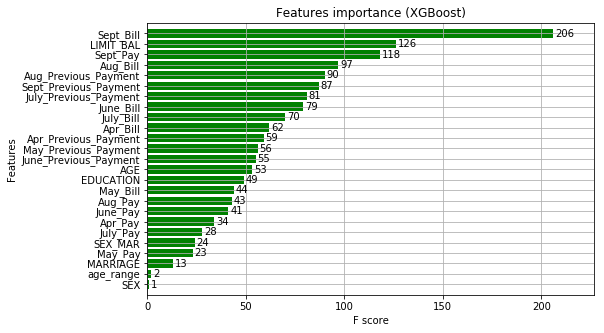

In [38]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

### LightGBM

In [68]:
params = {
          "objective" : "regression",
            "metric" : "auc", 
            "num_leaves" : 30,
            "learning_rate" : 0.1
         }

In [69]:
dtrain = lgb.Dataset(X_train, 
                     label=y_train)

dtest = lgb.Dataset(X_test,
                     label=y_test)

In [72]:
evals_results = {}

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain,dtest], 
                  valid_names=['train','test'], 
                  early_stopping_rounds=100,
                  verbose_eval=50, 
                  feval=None)

Training until validation scores don't improve for 100 rounds.
[50]	train's auc: 0.827713	test's auc: 0.781752
[100]	train's auc: 0.861397	test's auc: 0.776558
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.861397	test's auc: 0.776558


# Results

In [ ]:
results =[ ["DecisionTreeClassifier", "RandomForestClassifier", "CatBoostClassifier", "XGBoost", "LightGBM"] , 
           []
         ]